<h1 style="padding:15px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:160%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Analysis & Prediction Report
</h1>

<p style="text-align:center; margin-top: 20px;">
    <img src="https://ih1.redbubble.net/image.810044737.8981/raf,360x360,075,t,fafafa:ca443f4786.u2.jpg" style='width: 300px; height: 300px; border: 1px solid #ddd;'>
</p>

<p style="text-align:justify; font-family:serif; line-height:1.6; padding: 15px;">
    <b>[Topic Name]</b> is the primary focus of this study. In this section, you can provide a brief introduction to the research context, explaining its significance and the fundamental concepts required to understand the subsequent analysis.
    <br><br>
    You can add additional details here, such as global statistics, risk factors, or the main objective of this project (e.g., prediction, classification, or exploratory analysis).
</p>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px; margin:0; font-family:serif; font-size:130%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:500">Table Of Contents</p>

<div align="center">

| No | Contents | No | Contents |
|:---| :--- |:---| :---- |
| 1 | [Importing Libraries](#1) | 6 | [Correlation Analysis](#6) |
| 2 | [Dataset Overview](#2) | 7 | [Data Preprocessing](#7) |
| 3 | [Exploratory Data Analysis (EDA)](#3) | 8 | [Model Training](#8) |
| 4 | [Feature Visualization](#4) | 9 | [Performance Evaluation](#9) |
| 5 | [Feature Engineering](#5) | 10 | [Conclusions & Closing](#10) |

</div>
</div>

<div style="margin-top: 30px; padding: 15px; border: 1.5px solid #000000; border-radius: 20px; background-color: #ffffff; font-family: serif; color: #000000; text-align: center;">
    The dataset was shared by following link: 
    <a href="TU_LINK_AQUI" style="color: #000000; font-weight: bold; text-decoration: underline;">[Click here to view dataset]</a>
</div>

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:140%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Importing Libraries
</p>

In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Set visualization style
plt.style.use("seaborn-v0_8-darkgrid")
# To show all columns
pd.set_option('display.max_columns', 15)

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:140%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Dataset Overview
</p>

In [380]:
data = pd.read_csv("data/smoking.csv")
df = data.copy()

In [381]:
print(f"Shape of The Dataset : {df.shape}")
print(f"Glimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (55692, 27)
Glimpse of The Dataset :


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.300000,1.200000,1.000000,1.000000,1.000000,114.000000,73.000000,94.000000,215.000000,82.000000,73.000000,126.000000,12.900000,1.000000,0.700000,18.000000,19.000000,27.000000,Y,0,Y,0
1,1,F,40,160,60,81.000000,0.800000,0.600000,1.000000,1.000000,119.000000,70.000000,130.000000,192.000000,115.000000,42.000000,127.000000,12.700000,1.000000,0.600000,22.000000,19.000000,18.000000,Y,0,Y,0
2,2,M,55,170,60,80.000000,0.800000,0.800000,1.000000,1.000000,138.000000,86.000000,89.000000,242.000000,182.000000,55.000000,151.000000,15.800000,1.000000,1.000000,21.000000,16.000000,22.000000,Y,0,N,1
3,3,M,40,165,70,88.000000,1.500000,1.500000,1.000000,1.000000,100.000000,60.000000,96.000000,322.000000,254.000000,45.000000,226.000000,14.700000,1.000000,1.000000,19.000000,26.000000,18.000000,Y,0,Y,0
4,4,F,40,155,60,86.000000,1.000000,1.000000,1.000000,1.000000,120.000000,74.000000,80.000000,184.000000,74.000000,62.000000,107.000000,12.500000,1.000000,0.600000,16.000000,14.000000,22.000000,Y,0,N,0


In [382]:
df = df.drop("ID", axis = 1)
df.rename(columns = {
    "height(cm)" : "height_cm", "weight(kg)" : "weight_kg",
"waist(cm)" : "waist_cm", "eyesight(left)" : "eyesight_left",
"eyesight(right)" : "eyesight_right", "hearing(left)" : "hearing_left",
"hearing(right)" : "hearing_right", "fasting blood sugar" : "fasting_blood_sugar",
"Cholesterol" : "cholesterol", "HDL" : "hdl", "LDL" : "ldl",
"Urine protein" : "urine_protein", "serum creatinine" : "serum_creatinine",
"AST" : "ast", "ALT" : "alt", "Gtp" : "gtp", "dental caries" : "dental_caries"},
inplace = True)

In [383]:
print(f"Informations About The Dataset :\n")
print(df.info())

Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height_cm            55692 non-null  int64  
 3   weight_kg            55692 non-null  int64  
 4   waist_cm             55692 non-null  float64
 5   eyesight_left        55692 non-null  float64
 6   eyesight_right       55692 non-null  float64
 7   hearing_left         55692 non-null  float64
 8   hearing_right        55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting_blood_sugar  55692 non-null  float64
 12  cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  hdl                  55692 non-null  float64
 15  ld

In [384]:
df.describe().T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

,count,mean,std,min,25%,50%,75%,max
age,55692.000000,44.182917,12.071418,20.000000,40.000000,40.000000,55.000000,85.000000
height_cm,55692.000000,164.649321,9.194597,130.000000,160.000000,165.000000,170.000000,190.000000
weight_kg,55692.000000,65.864936,12.820306,30.000000,55.000000,65.000000,75.000000,135.000000
waist_cm,55692.000000,82.046418,9.274223,51.000000,76.000000,82.000000,88.000000,129.000000
eyesight_left,55692.000000,1.012623,0.486873,0.100000,0.800000,1.000000,1.200000,9.900000
eyesight_right,55692.000000,1.007443,0.485964,0.100000,0.800000,1.000000,1.200000,9.900000
hearing_left,55692.000000,1.025587,0.157902,1.000000,1.000000,1.000000,1.000000,2.000000
hearing_right,55692.000000,1.026144,0.159564,1.000000,1.000000,1.000000,1.000000,2.000000
systolic,55692.000000,121.494218,13.675989,71.000000,112.000000,120.000000,130.000000,240.000000
relaxation,55692.000000,76.004830,9.679278,40.000000,70.000000,76.000000,82.000000,146.000000


In [385]:
df.describe(include = object).T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
gender,55692,2,M,35401
oral,55692,1,Y,55692
tartar,55692,2,Y,30940


In [386]:
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a979b9a9d8f","color":"white","border": "1.5px  solid black"})

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [387]:
dup = df[df.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {data.shape[0]} entries in this dataset.")

df.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There are 11140 duplicate entries among 55692 entries in this dataset.

After removing duplicate entries there are 55692 entries in this dataset.


<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:140%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Preliminary Data Cleaning
</p>

In [388]:
df["gender"] = df["gender"].replace({"M" : "Male" , "F" : "Female"})
df["dental_caries"] = df["dental_caries"].replace({1 : "Yes" , 0 : "No"})
df["tartar"] = df["tartar"].replace({"Y" : "Yes" , "N" : "No"})
df["smoking"] = df["smoking"].replace({1 : "Yes" , 0 : "No"})
df = df.drop(["hearing_right","hearing_left","oral"], axis = 1)

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:140%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Data Visualization
</p>

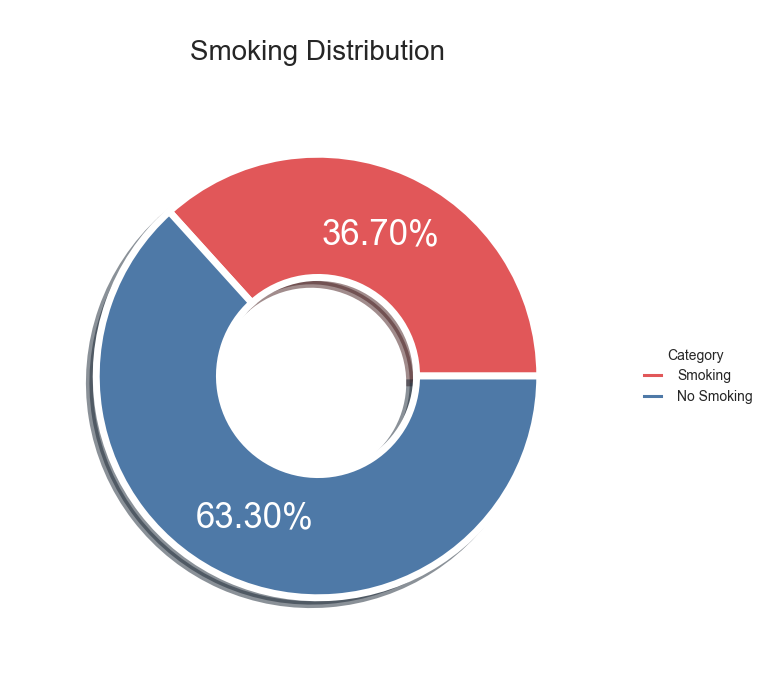

In [389]:
plt.subplots(figsize=(8, 8))

labels = "Smoking","No Smoking"
size = 0.5

wedges, texts, autotexts = plt.pie([len(df[df["smoking"]== "Yes"]),
                                    len(df[df["smoking"]== "No"])],
                                    explode = (0,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = ["#e15759","#4e79a7"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nSmoking Distribution",fontsize=20)
plt.show()

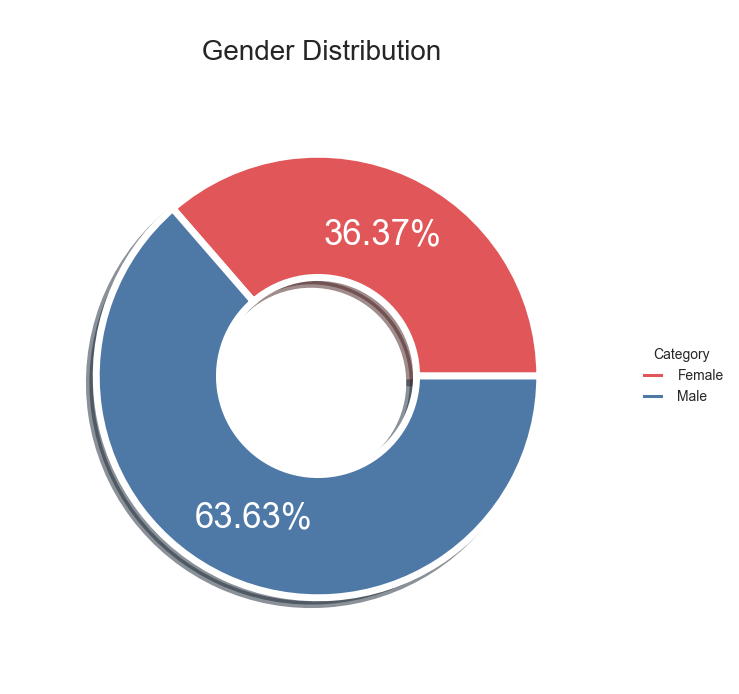

In [390]:
plt.subplots(figsize=(8, 8))

labels = "Female","Male"
size = 0.5

wedges, texts, autotexts = plt.pie([len(df[df["gender"]=="Female"]),
                                    len(df[df["gender"]=="Male"])],
                                    explode = (0,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = ["#e15759","#4e79a7"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\n Gender Distribution",fontsize=20)
plt.show()

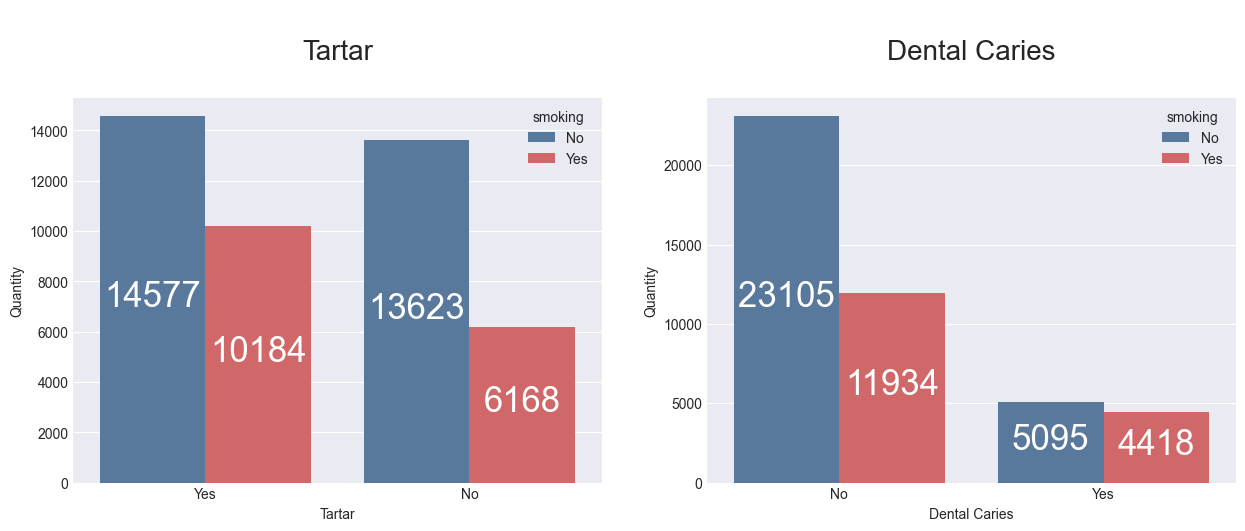

In [391]:
_, axs = plt.subplots(1, 2, figsize=(15, 5)) 

sns.countplot(data=df, x="tartar", hue="smoking", palette=["#4e79a7", "#e15759"], ax=axs[0])

axs[0].set_title("\nTartar\n", fontsize=20)
axs[0].set_xlabel("Tartar")
axs[0].set_ylabel("Quantity")

for container in axs[0].containers:
    axs[0].bar_label(container, label_type="center", padding=2, size=25, color="white", rotation=0)

sns.countplot(data=df, x="dental_caries", hue="smoking", palette=["#4e79a7", "#e15759"], ax=axs[1])

axs[1].set_title("\nDental Caries\n", fontsize=20)
axs[1].set_xlabel("Dental Caries")
axs[1].set_ylabel("Quantity")

for container in axs[1].containers:
    axs[1].bar_label(container, label_type="center", padding=2, size=25, color="white", rotation=0)



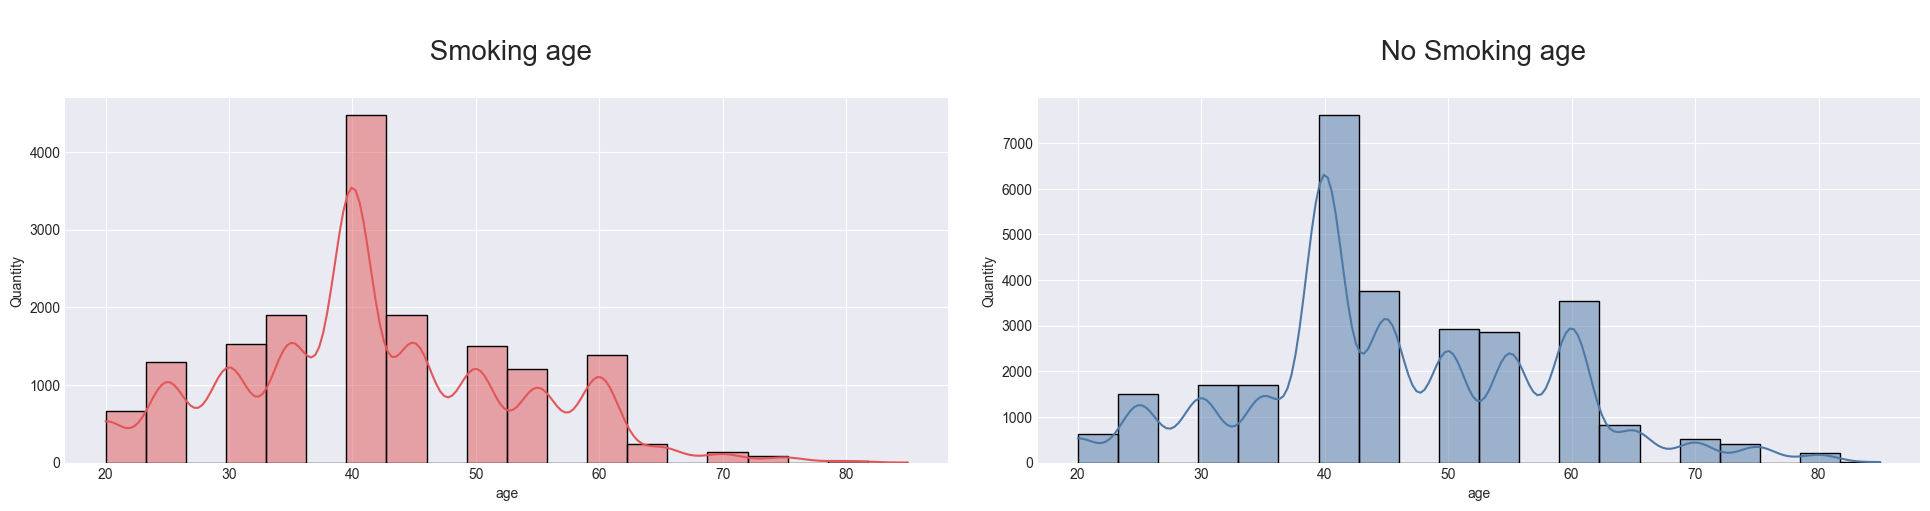

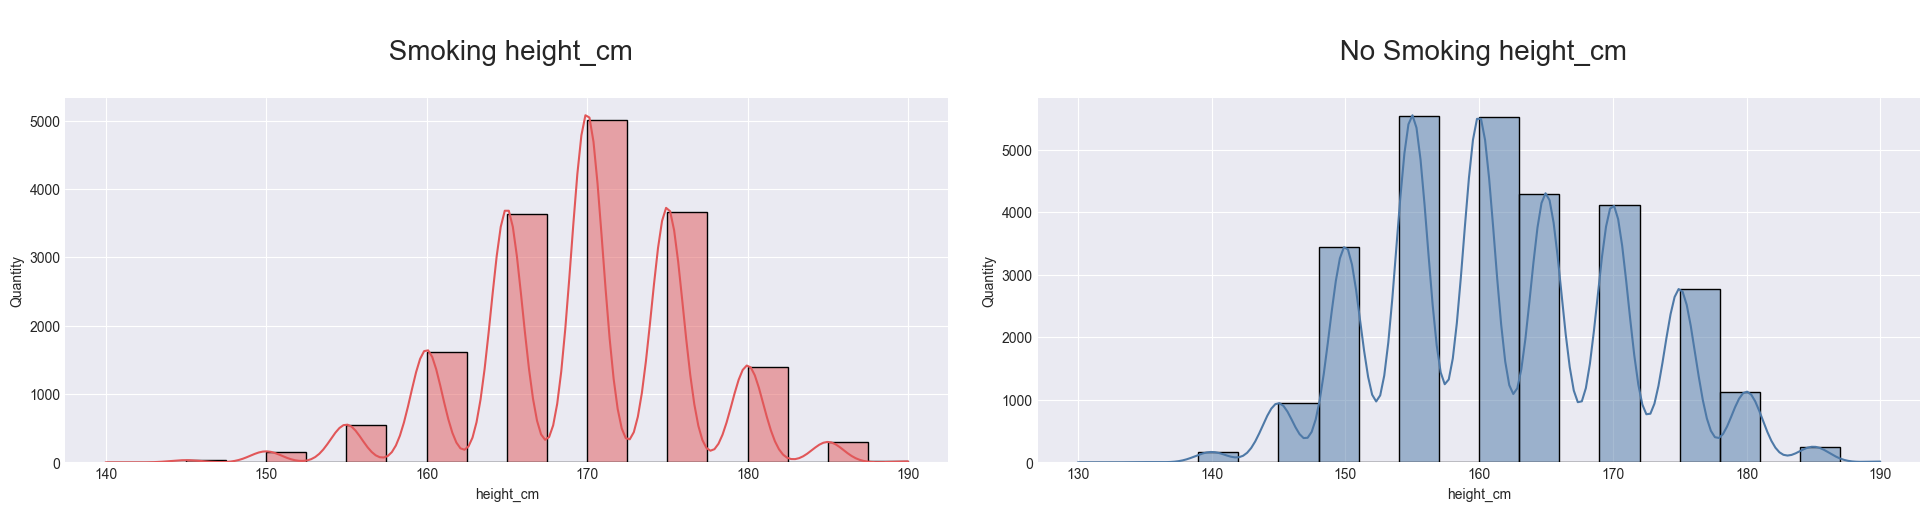

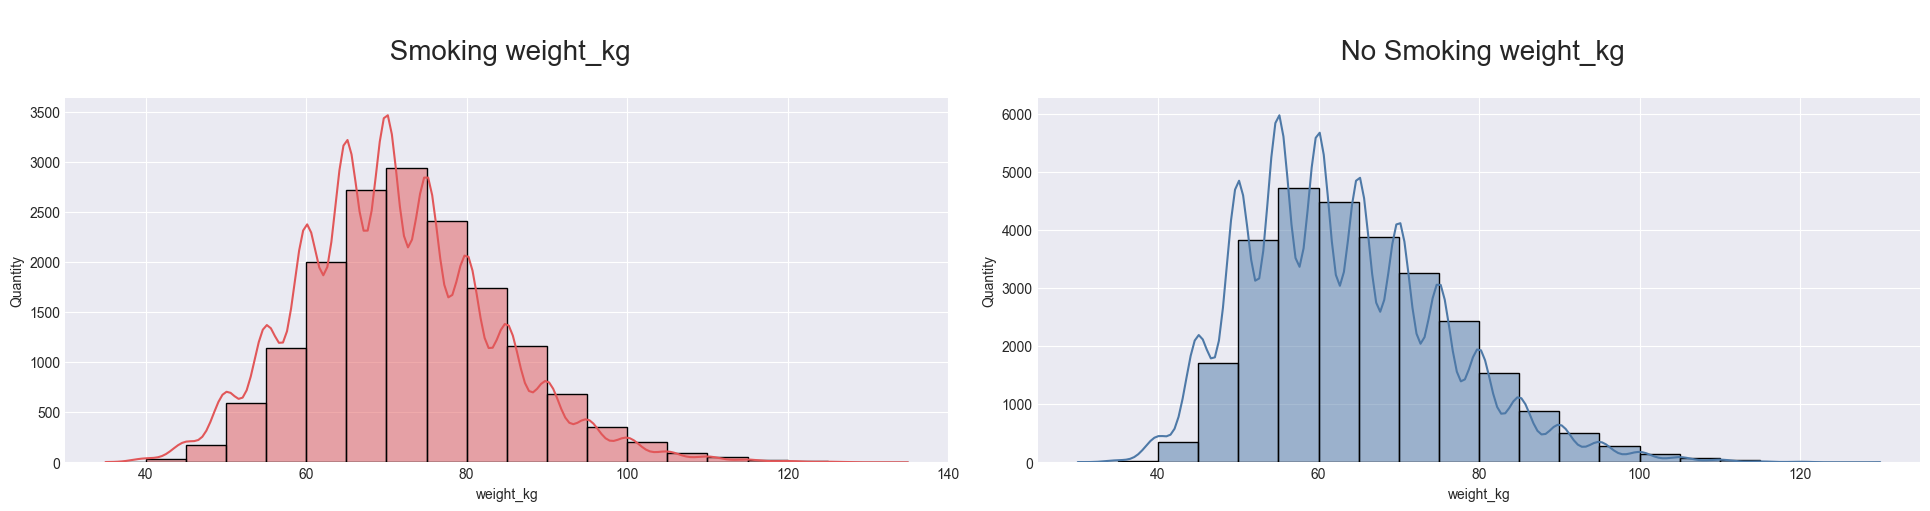

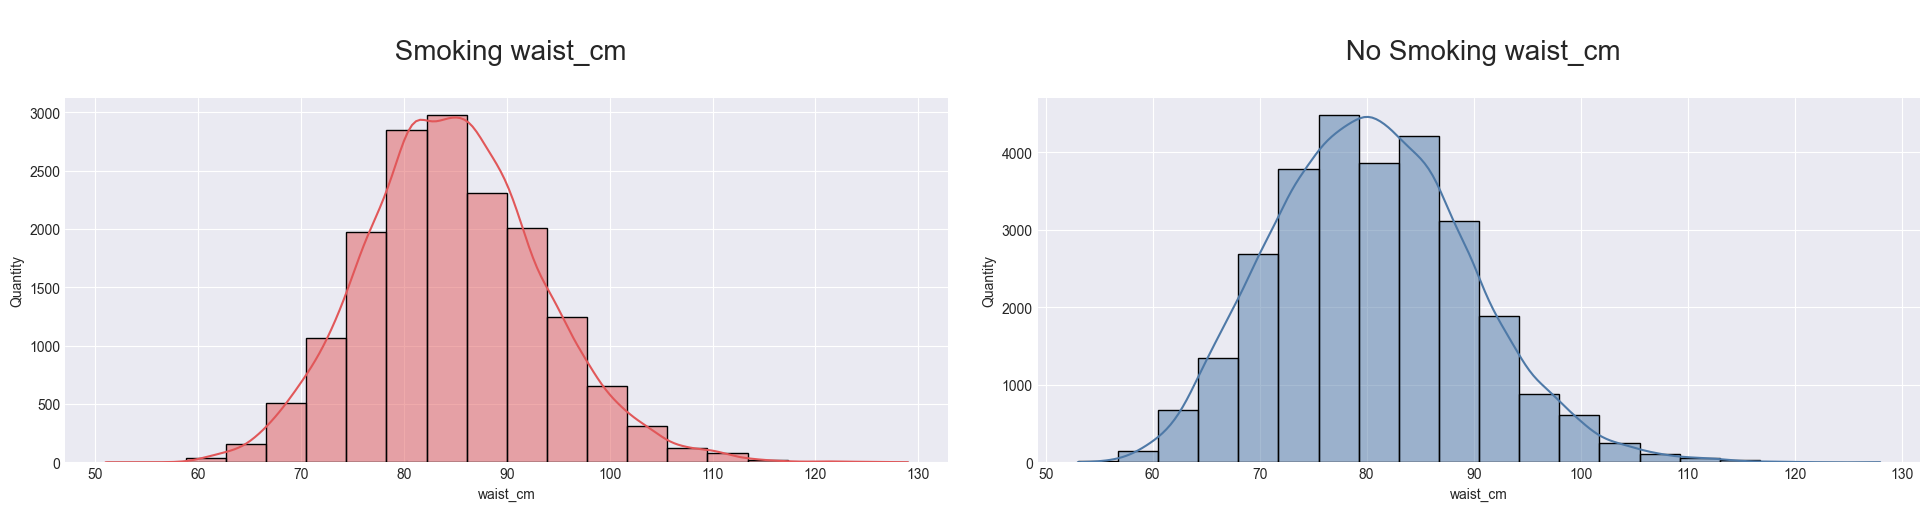

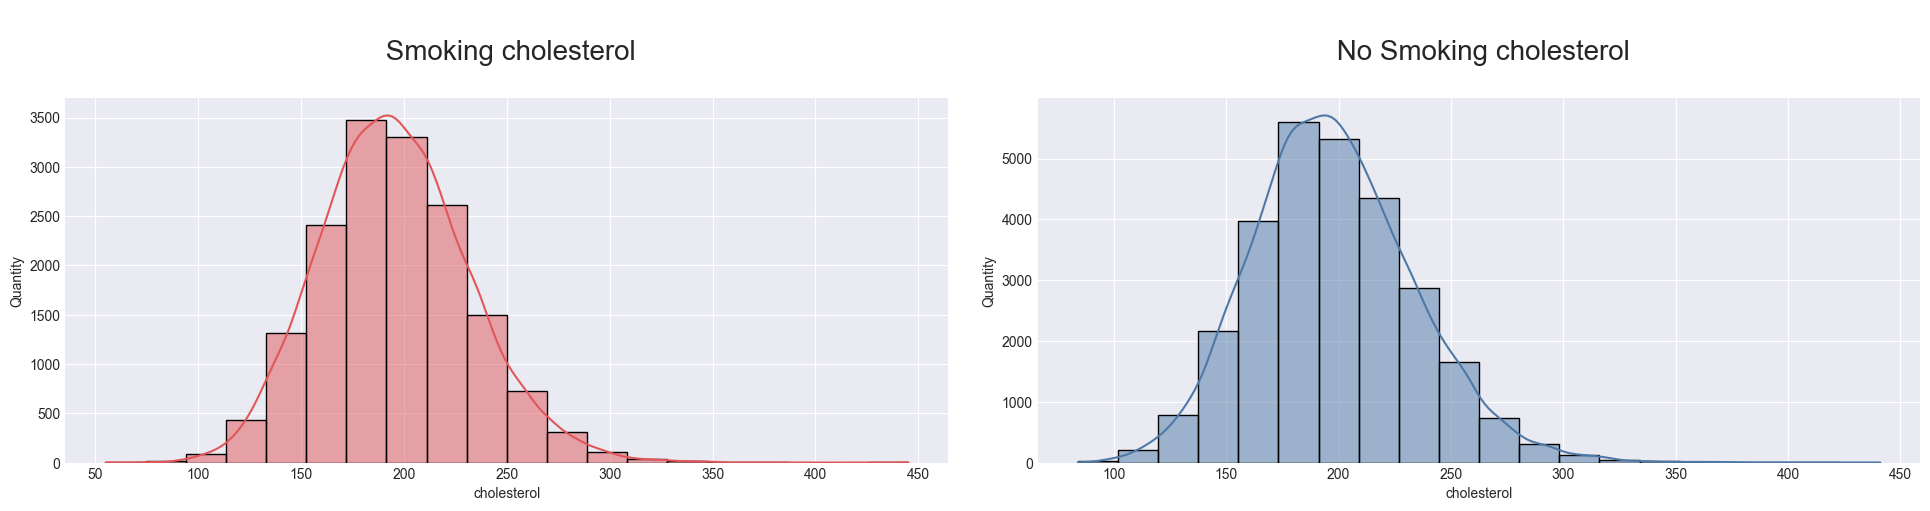

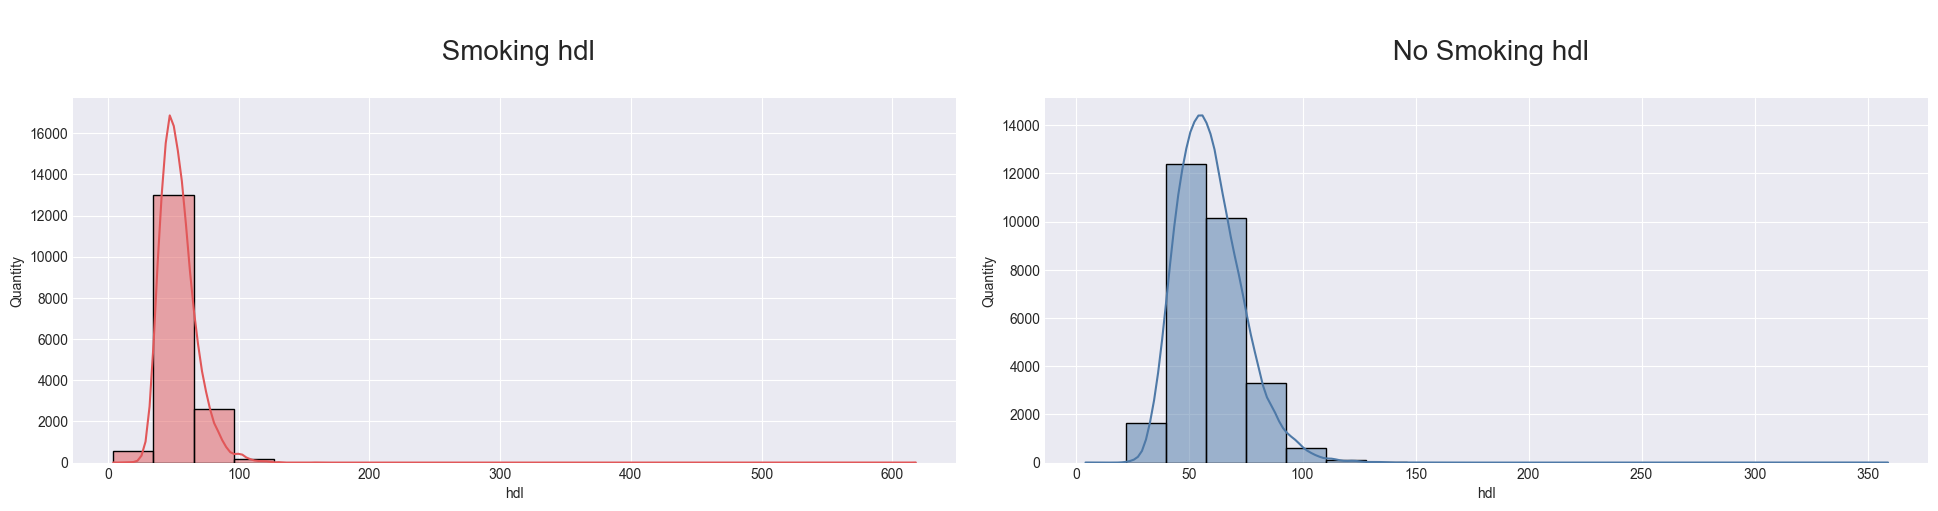

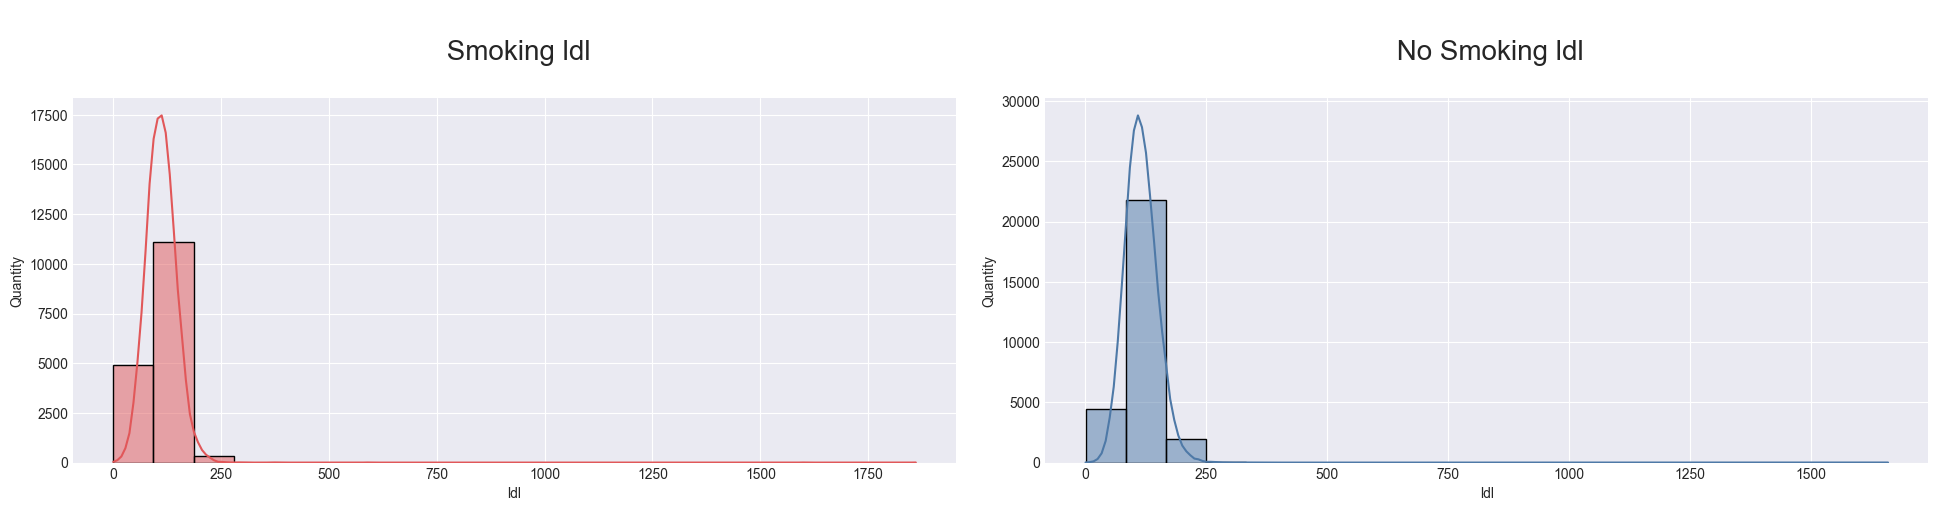

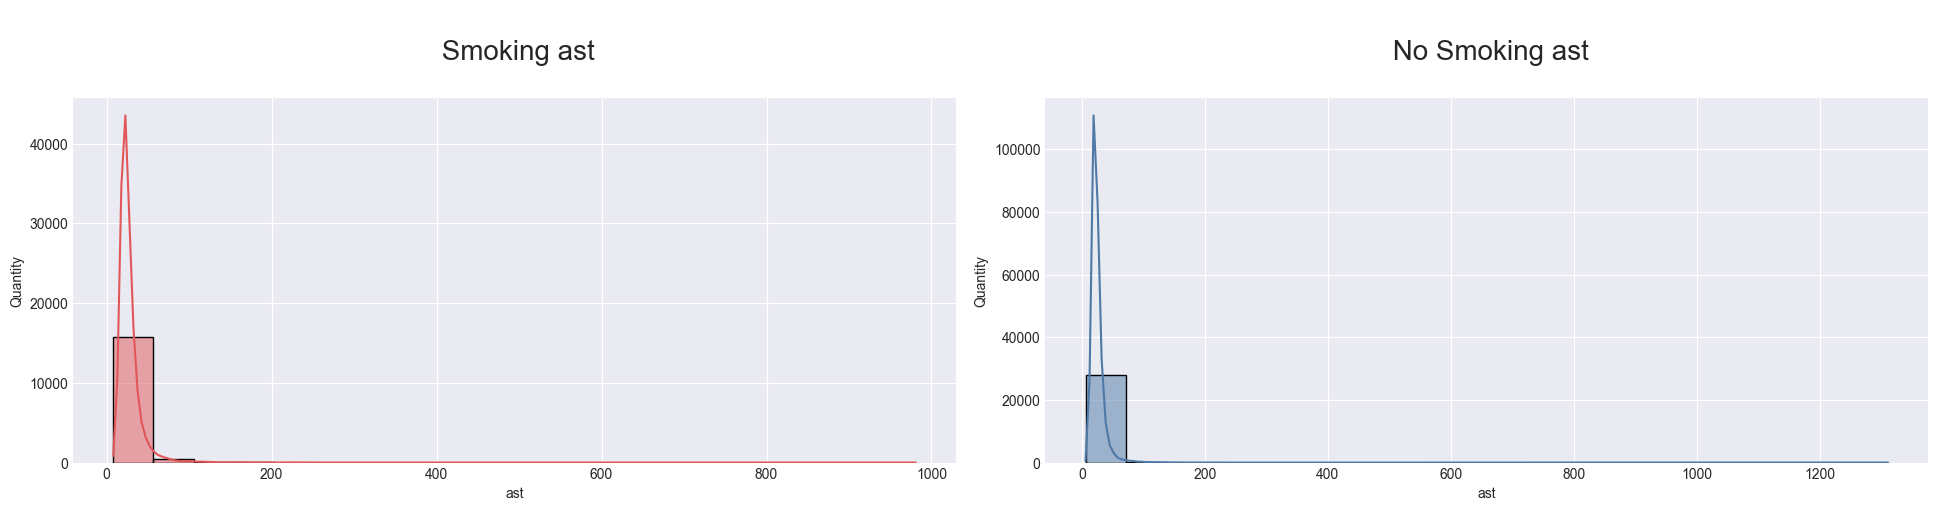

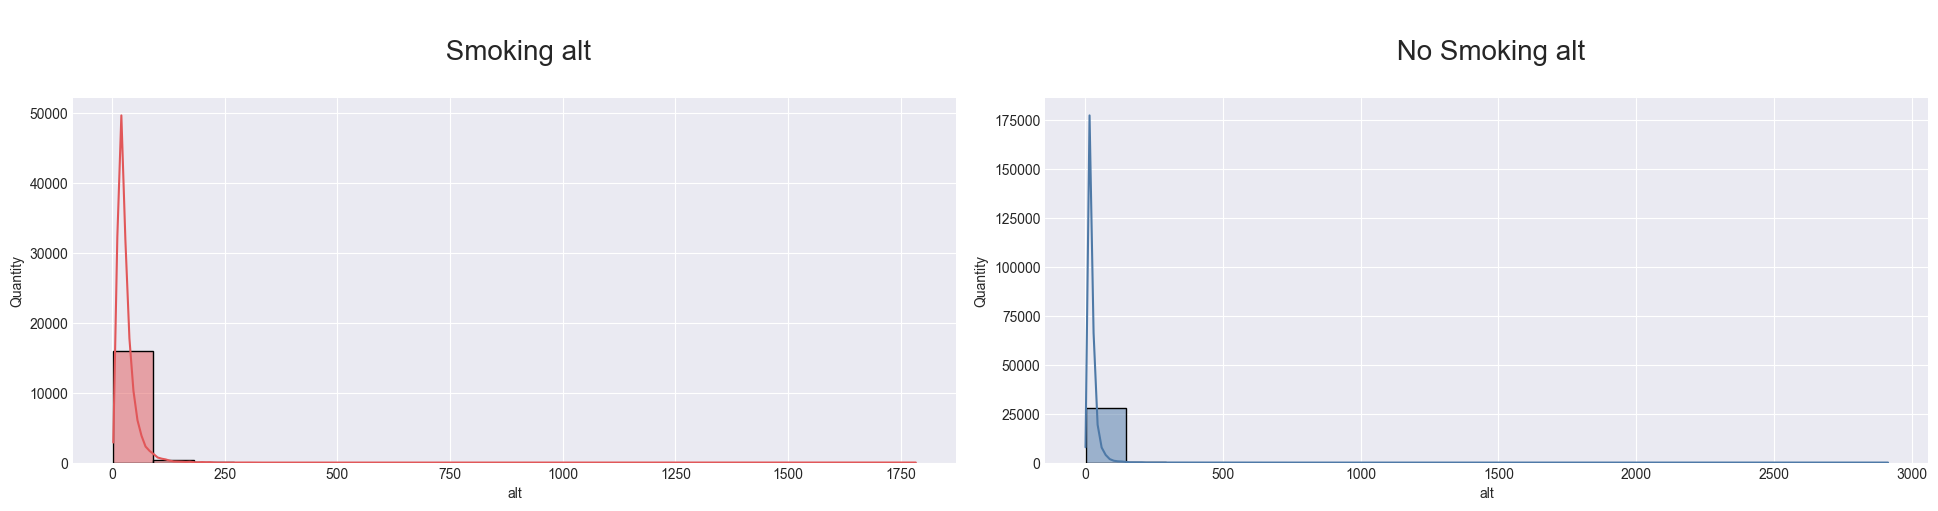

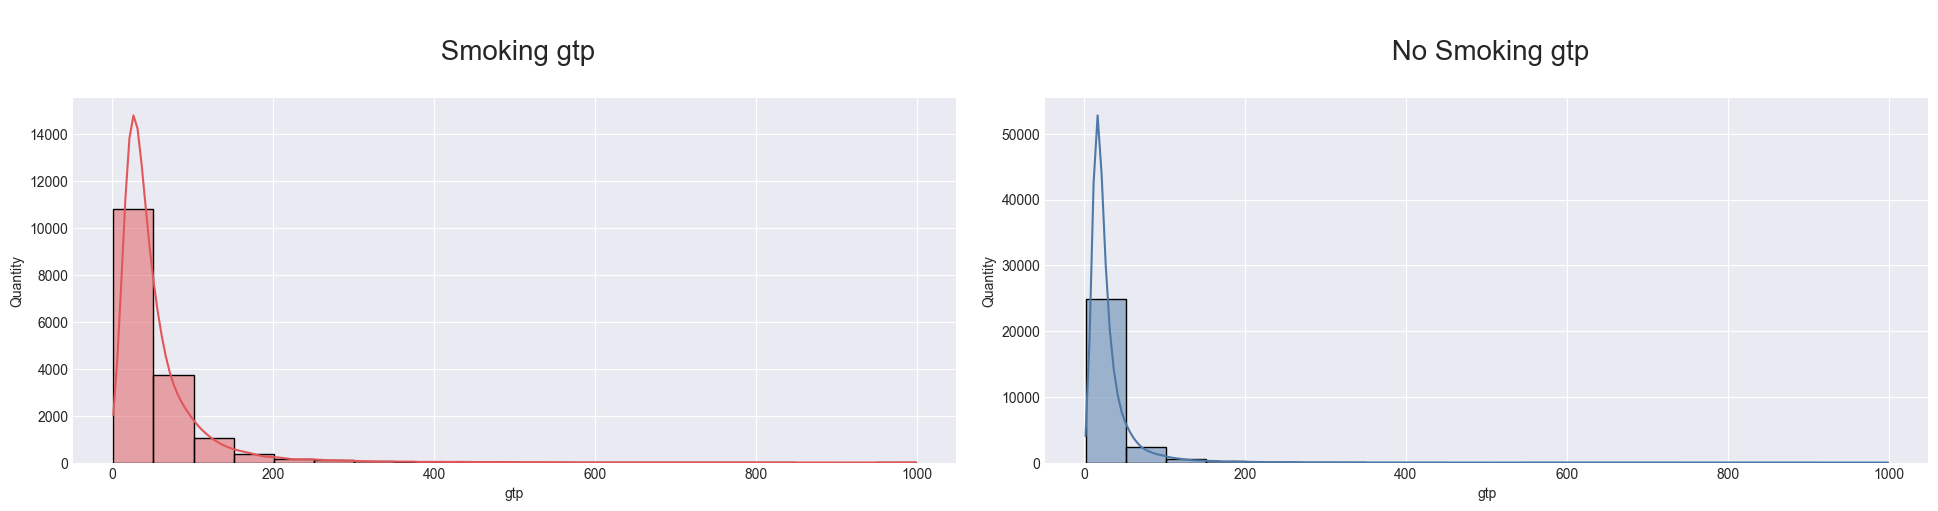

In [392]:
select_columns = ["age","height_cm", "weight_kg", "waist_cm", "cholesterol", "hdl", "ldl", "ast", "alt", "gtp"]

for column in select_columns:
    _, axs = plt.subplots(1,2,figsize=(20,5))
    plt.tight_layout(pad=4.0)

    sns.histplot(df[df['smoking']=="Yes"][column], bins=20, color='#e15759', kde=True, ax=axs[0])
    axs[0].set_title(f"\n Smoking {column}\n",fontsize=20)
    axs[0].set_xlabel(f"{column}")
    axs[0].set_ylabel("Quantity")

    sns.histplot(df[df['smoking']=="No"][column], bins=20, color='#4e79a7', kde=True, ax=axs[1])
    axs[1].set_title(f"\n No Smoking {column}\n",fontsize=20)
    axs[1].set_xlabel(f"{column}")
    axs[1].set_ylabel("Quantity")

In [393]:
df.head().style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
0,Female,40,155,60,81.300000,1.200000,1.000000,114.000000,73.000000,94.000000,215.000000,82.000000,73.000000,126.000000,12.900000,1.000000,0.700000,18.000000,19.000000,27.000000,No,Yes,No
1,Female,40,160,60,81.000000,0.800000,0.600000,119.000000,70.000000,130.000000,192.000000,115.000000,42.000000,127.000000,12.700000,1.000000,0.600000,22.000000,19.000000,18.000000,No,Yes,No
2,Male,55,170,60,80.000000,0.800000,0.800000,138.000000,86.000000,89.000000,242.000000,182.000000,55.000000,151.000000,15.800000,1.000000,1.000000,21.000000,16.000000,22.000000,No,No,Yes
3,Male,40,165,70,88.000000,1.500000,1.500000,100.000000,60.000000,96.000000,322.000000,254.000000,45.000000,226.000000,14.700000,1.000000,1.000000,19.000000,26.000000,18.000000,No,Yes,No
4,Female,40,155,60,86.000000,1.000000,1.000000,120.000000,74.000000,80.000000,184.000000,74.000000,62.000000,107.000000,12.500000,1.000000,0.600000,16.000000,14.000000,22.000000,No,No,No


In [394]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

df["smoking"] = LabelEncoder.fit_transform(df["smoking"])
df["dental_caries"] = LabelEncoder.fit_transform(df["dental_caries"])
df["tartar"] = LabelEncoder.fit_transform(df["tartar"])
df["gender"] = LabelEncoder.fit_transform(df["gender"])

In [395]:
df.head().style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
0,0,40,155,60,81.300000,1.200000,1.000000,114.000000,73.000000,94.000000,215.000000,82.000000,73.000000,126.000000,12.900000,1.000000,0.700000,18.000000,19.000000,27.000000,0,1,0
1,0,40,160,60,81.000000,0.800000,0.600000,119.000000,70.000000,130.000000,192.000000,115.000000,42.000000,127.000000,12.700000,1.000000,0.600000,22.000000,19.000000,18.000000,0,1,0
2,1,55,170,60,80.000000,0.800000,0.800000,138.000000,86.000000,89.000000,242.000000,182.000000,55.000000,151.000000,15.800000,1.000000,1.000000,21.000000,16.000000,22.000000,0,0,1
3,1,40,165,70,88.000000,1.500000,1.500000,100.000000,60.000000,96.000000,322.000000,254.000000,45.000000,226.000000,14.700000,1.000000,1.000000,19.000000,26.000000,18.000000,0,1,0
4,0,40,155,60,86.000000,1.000000,1.000000,120.000000,74.000000,80.000000,184.000000,74.000000,62.000000,107.000000,12.500000,1.000000,0.600000,16.000000,14.000000,22.000000,0,0,0


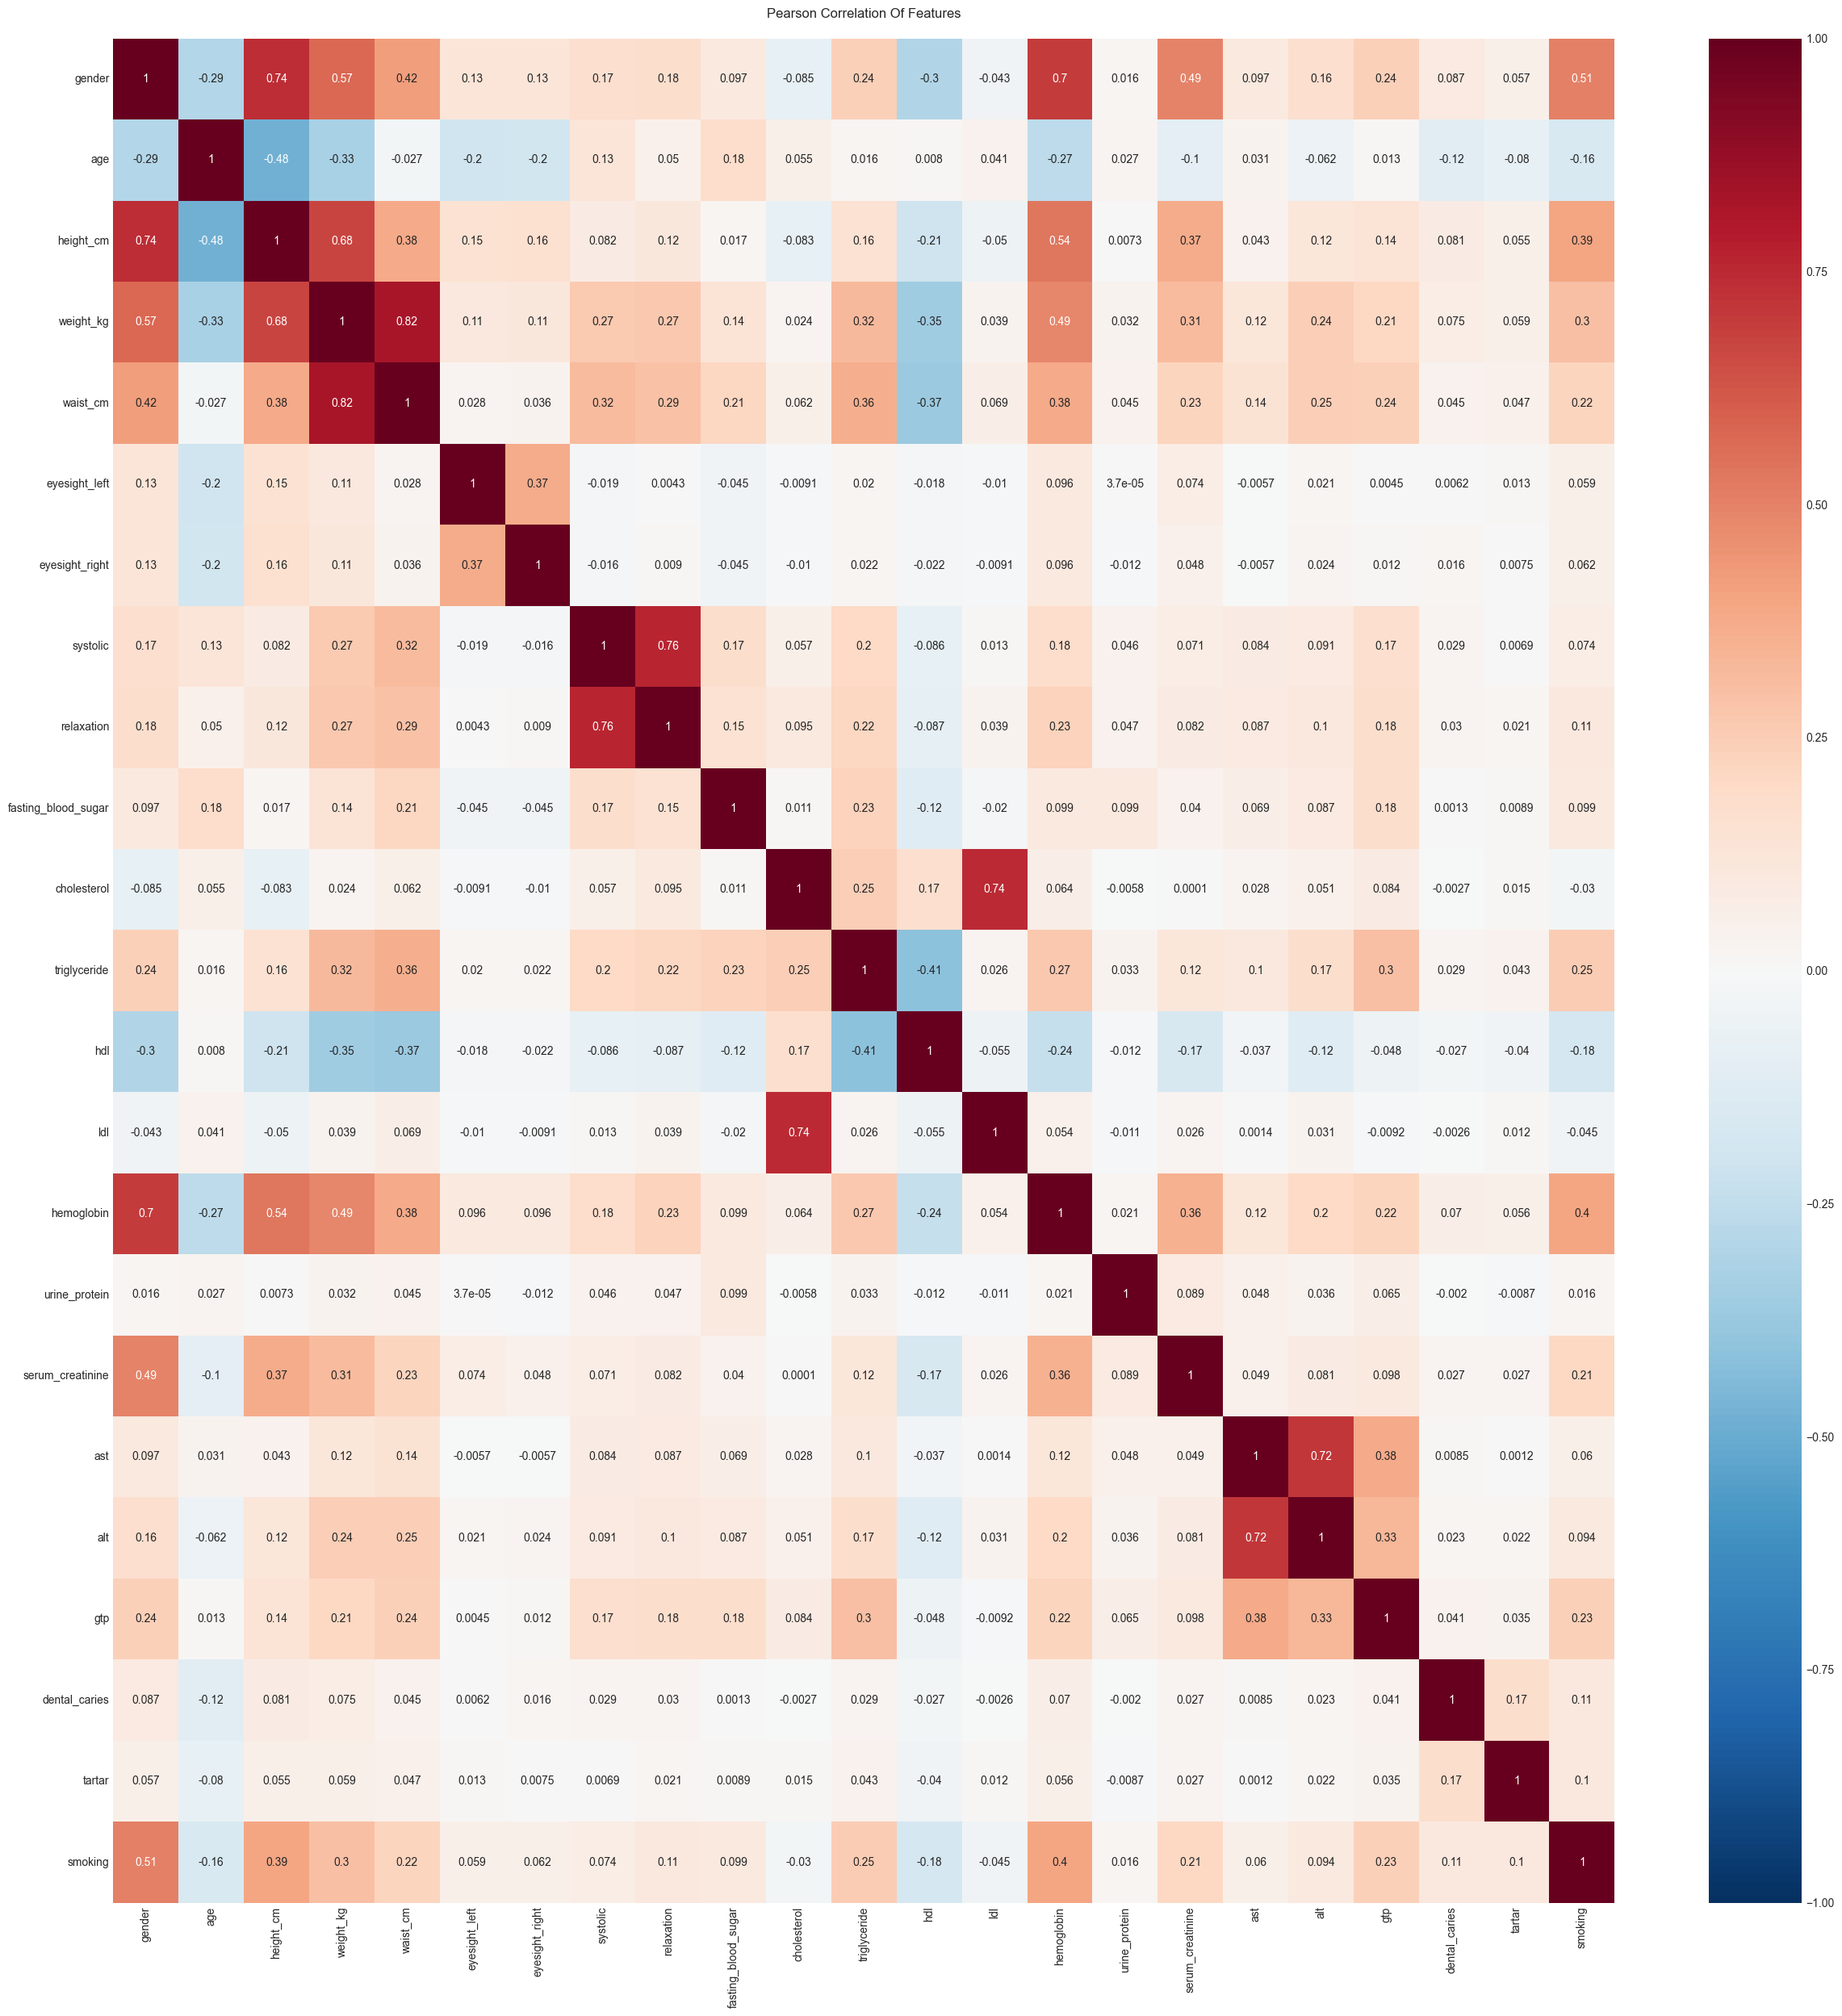

In [396]:
plt.subplots(figsize =(30, 30))

sns.heatmap(df.corr(), annot=True, cmap="RdBu_r", vmin=-1, vmax=1)
plt.title("Pearson Correlation Of Features\n")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [403]:
df.columns

Index(['gender', 'age', 'height_cm', 'weight_kg', 'waist_cm', 'eyesight_left',
       'eyesight_right', 'systolic', 'relaxation', 'fasting_blood_sugar',
       'cholesterol', 'triglyceride', 'hdl', 'ldl', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'ast', 'alt', 'gtp',
       'dental_caries', 'tartar', 'smoking'],
      dtype='object')

In [404]:
X = df.drop("smoking", axis = 1)
y = df["smoking"]

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

scaler = RobustScaler()
cols_to_scale = ['age', 'height_cm', 'weight_kg', 'waist_cm', 'triglyceride', 'gtp', 'alt', 'ast', 'hemoglobin']
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

print(f"Shape of training data : {X_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {X_test.shape}, {y_test.shape}")

Shape of training data : (35641, 22), (35641,)
Shape of testing data : (8911, 22), (8911,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

Confusion Matrix : 

[[4360 1244]
 [1021 2286]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      5604
           1       0.65      0.69      0.67      3307

    accuracy                           0.75      8911
   macro avg       0.73      0.73      0.73      8911
weighted avg       0.75      0.75      0.75      8911


The Accuracy of Logistic Regression is 74.58 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfg = RandomForestClassifier(n_estimators = 500, random_state = 20) 
rfg.fit(X_train, y_train)
rfg_pred = rfg.predict(X_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")